# Pre-post Analysis Notebook

This notebook will use pre-post comparison to analyze the data for three policy changes in Florida, Texas, and Washington, in order to know the the effect of these policy changes on both opioid shipments and overdose deaths (For Texas, only analyze overdose deaths).

In [1]:
# import packages
import pandas as pd
import numpy as np
import altair as alt
import statsmodels.formula.api as smf
import statsmodels as sm
from plotnine import *


Steps:
1. Normalize for size using population
2. Create a dataframe for rates before the policy
3. Create a dataframe for rates after the policy
4. Merge the two
5. Get difference between them - should decrease

- Texas - Jan 2007
- Washington - Jan 2012
- Florida - 2010

In [2]:
# import dataset
working_dir = "../20_intermediate_files/"
final = working_dir + "analysis_df.csv"
# read in the data as a pandas dataframe
final_df = pd.read_csv(final)
# change year column to datetime
# final_df['year'] = pd.to_datetime(final_df['year'], format='%Y').copy()
final_df.head()


,county_name,state,year,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,"AUTAUGA COUNTY, AL",AL,2003,1001,10012003,NaN,NaN,54571,NaN,NaN
1,"AUTAUGA COUNTY, AL",AL,2004,1001,10012004,NaN,NaN,54571,NaN,NaN
2,"AUTAUGA COUNTY, AL",AL,2005,1001,10012005,NaN,NaN,54571,NaN,NaN
3,"AUTAUGA COUNTY, AL",AL,2006,1001,10012006,NaN,20569.0,54571,NaN,37692.180829
4,"AUTAUGA COUNTY, AL",AL,2007,1001,10012007,NaN,12550.0,54571,NaN,22997.562808


In [3]:
# set NA to 0
final_df = final_df.fillna(0)
final_df.head()


,county_name,state,year,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,"AUTAUGA COUNTY, AL",AL,2003,1001,10012003,0.0,0.0,54571,0.0,0.000000
1,"AUTAUGA COUNTY, AL",AL,2004,1001,10012004,0.0,0.0,54571,0.0,0.000000
2,"AUTAUGA COUNTY, AL",AL,2005,1001,10012005,0.0,0.0,54571,0.0,0.000000
3,"AUTAUGA COUNTY, AL",AL,2006,1001,10012006,0.0,20569.0,54571,0.0,37692.180829
4,"AUTAUGA COUNTY, AL",AL,2007,1001,10012007,0.0,12550.0,54571,0.0,22997.562808


## Pre-post Analysis for Florida

In [4]:
fl_df = final_df.loc[final_df["state"] == "FL"]
fl_df = fl_df.groupby(["year", "county_name"], as_index=False).mean()

fl_before_df = fl_df.loc[fl_df["year"] < 2010]
fl_after_df = fl_df.loc[fl_df["year"] >= 2010]

# year, county -> one row
fl_df.head()


/var/folders/rp/l0l3mhgx4zs1vfg5y9_c2qw80000gn/T/ipykernel_98893/3325043555.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,year,county_name,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,2003,"ALACHUA COUNTY, FL",12001.0,120012003.0,11.0,0.0,247336.0,4.447391,0.0
1,2003,"BAKER COUNTY, FL",12003.0,120032003.0,0.0,0.0,27115.0,0.000000,0.0
2,2003,"BAY COUNTY, FL",12005.0,120052003.0,21.0,0.0,168852.0,12.436927,0.0
3,2003,"BRADFORD COUNTY, FL",12007.0,120072003.0,0.0,0.0,28520.0,0.000000,0.0
4,2003,"BREVARD COUNTY, FL",12009.0,120092003.0,97.0,0.0,543376.0,17.851359,0.0


### Florida's Opioid Shipments Changes

/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../30_results/prepost_Florida_opioid_shipment.pdf


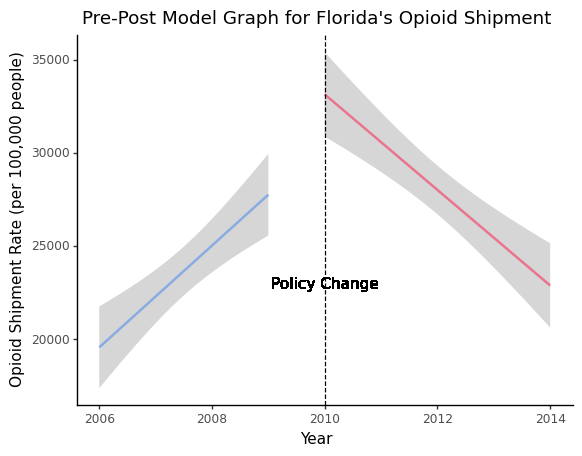

In [5]:
# plot the effect on opioid shipments during 2006-2014 (policy change in 2010)
fl_shiprate_plot = (
    ggplot(fl_df, aes(x="year", y="ship_rate"))
    + geom_smooth(
        method="lm",
        data=fl_before_df,
        se=True,
        color="#89ABE3FF",
    )
    + geom_smooth(
        method="lm",
        data=fl_after_df,
        se=True,
        color="#EA738DFF",
    )
    # + scale_x_continuous(breaks=[2006,
    #                      2008, 2010, 2012, 2014, 2016])
    + geom_vline(xintercept=2010, linetype="dashed")
    + geom_text(x=2010, y=23000, label="Policy Change", color="black")
    + theme_classic()
    + labs(title="Pre-Post Model Graph for Florida's Opioid Shipment")
    + xlab("Year")
    + xlim(2006, 2014)
    + ylab("Opioid Shipment Rate (per 100,000 people)")
)
fl_shiprate_plot.save("../30_results/prepost_Florida_opioid_shipment.pdf")
print(fl_shiprate_plot)


### Florida's Overdose Deaths Changes

/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../30_results/prepost_Florida_overdose_deaths.pdf


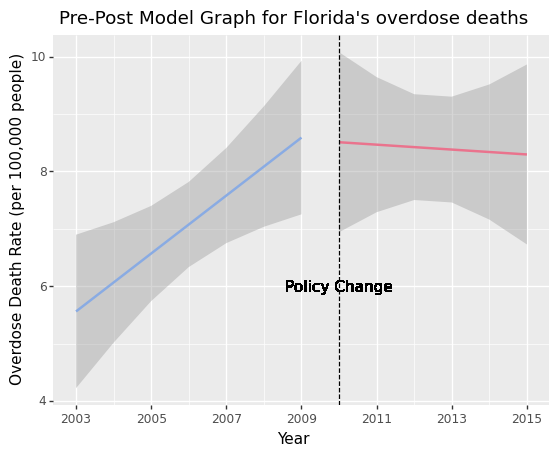

In [6]:
# plot the effect on overdose deaths during 2003-2015 (policy change in 2010)

fl_overdose_plot = (
    ggplot(fl_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=fl_before_df,
        se=True,
        color="#89ABE3FF",
    )
    + geom_smooth(
        method="lm",
        data=fl_after_df,
        se=True,
        color="#EA738DFF",
    )
    + scale_x_continuous(breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015])
    + geom_vline(xintercept=2010, linetype="dashed")
    + geom_text(x=2010, y=6, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Florida's overdose deaths")
    + xlab("Year")
    # + xlim(2003, 2015)
    + ylab("Overdose Death Rate (per 100,000 people)")
)
fl_overdose_plot.save("../30_results/prepost_Florida_overdose_deaths.pdf")
print(fl_overdose_plot)


## Pre-Post Analysis for Texas

In [7]:
# select the useful part of data for Texas
tx_df = final_df[final_df["state"] == "TX"]


In [8]:
# calculate the average drug_deaths(indicate overdose deaths)
tx_df = tx_df.groupby(["year", "county_name"], as_index=False).mean()


/var/folders/rp/l0l3mhgx4zs1vfg5y9_c2qw80000gn/T/ipykernel_98893/3598863444.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


### Texas' Overdose Deaths Changes

/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../30_results/prepost_Texas_overdose_deaths.pdf


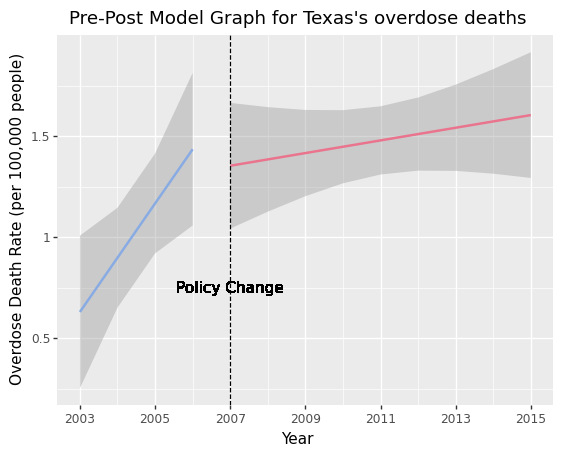

In [9]:
# plot the effect on overdose deaths during 2003-2015 (policy change in 2007)
tx_overdose_plot = (
    ggplot(tx_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=tx_df[tx_df["year"] < 2007],
        se=True,
        color="#89ABE3FF",
    )
    + geom_smooth(
        method="lm",
        data=tx_df[tx_df["year"] >= 2007],
        se=True,
        color="#EA738DFF",
    )
    + scale_x_continuous(breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015])
    + geom_vline(xintercept=2007, linetype="dashed")
    + geom_text(x=2007, y=0.75, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Texas's overdose deaths")
    + xlab("Year")
    # + xlim(2003, 2015)
    + ylab("Overdose Death Rate (per 100,000 people)")
)
tx_overdose_plot.save("../30_results/prepost_Texas_overdose_deaths.pdf")
print(tx_overdose_plot)


## Pre-Post Analysis for Washington

In [10]:
# select the useful part of data for Washington
wa_df = final_df[final_df["state"] == "WA"]


In [11]:
# calculate the average ship_rate(indicate opioid shipments) and drug_deaths(indicate overdose deaths)
wa_df = wa_df.groupby(["year", "county_name"], as_index=False).mean()
wa_df


/var/folders/rp/l0l3mhgx4zs1vfg5y9_c2qw80000gn/T/ipykernel_98893/2098618468.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,year,county_name,fips,merge_key,drug_deaths,drug_quantity,population,death_rate,ship_rate
0,2003,"ADAMS COUNTY, WA",53001.0,530012003.0,0.0,0.0,18728.0,0.000000,0.0
1,2003,"ASOTIN COUNTY, WA",53003.0,530032003.0,0.0,0.0,21623.0,0.000000,0.0
2,2003,"BENTON COUNTY, WA",53005.0,530052003.0,10.0,0.0,175177.0,5.708512,0.0
3,2003,"CHELAN COUNTY, WA",53007.0,530072003.0,0.0,0.0,72453.0,0.000000,0.0
4,2003,"CLALLAM COUNTY, WA",53009.0,530092003.0,0.0,0.0,71404.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
502,2015,"WAHKIAKUM COUNTY, WA",53069.0,530692015.0,0.0,0.0,3978.0,0.000000,0.0
503,2015,"WALLA WALLA COUNTY, WA",53071.0,530712015.0,0.0,0.0,58781.0,0.000000,0.0
504,2015,"WHATCOM COUNTY, WA",53073.0,530732015.0,23.0,0.0,201140.0,11.434822,0.0
505,2015,"WHITMAN COUNTY, WA",53075.0,530752015.0,0.0,0.0,44776.0,0.000000,0.0


### Washington's Opioid Shipments Changes

/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/scales/scales.py:36: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../30_results/prepost_Washington_opioid_shipment.pdf


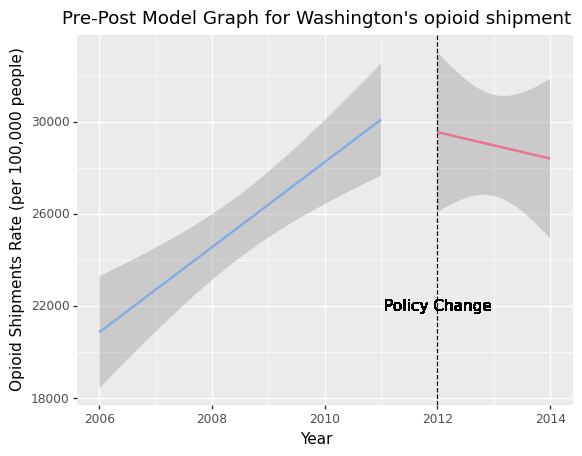

In [12]:
# plot the effect on opioid shipments during 2006-2014 (policy change in 2012)
wa_shiprate_plot = (
    ggplot(wa_df, aes(x="year", y="ship_rate"))
    + geom_smooth(
        method="lm",
        data=wa_df[wa_df["year"] < 2012],
        se=True,
        color="#89ABE3FF",
    )
    + geom_smooth(
        method="lm",
        data=wa_df[wa_df["year"] >= 2012],
        se=True,
        color="#EA738DFF",
    )
    + scale_x_continuous(breaks=[2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016])
    + geom_vline(xintercept=2012, linetype="dashed")
    + geom_text(x=2012, y=22000, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Washington's opioid shipment")
    + xlab("Year")
    + xlim(2006, 2014)
    + ylab("Opioid Shipments Rate (per 100,000 people)")
)
wa_shiprate_plot.save("../30_results/prepost_Washington_opioid_shipment.pdf")
print(wa_shiprate_plot)


### Washington's Overdose Deaths Changes

/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/yer1k/opt/miniconda3/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ../30_results/prepost_Washington_overdose_deaths.pdf


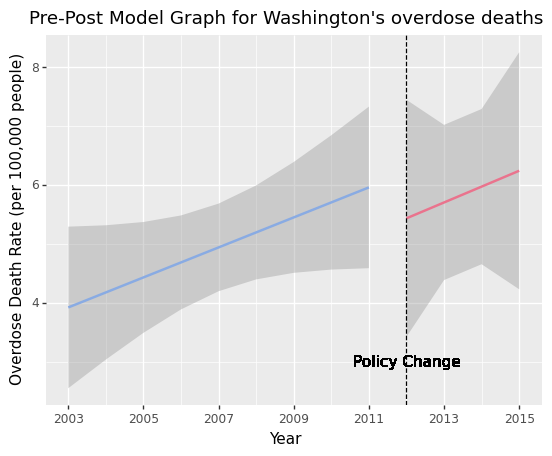

In [13]:
# plot the effect on overdose deaths during 2003-2015 (policy change in 2012)
wa_overdose_plot = (
    ggplot(wa_df, aes(x="year", y="death_rate"))
    + geom_smooth(
        method="lm",
        data=wa_df[wa_df["year"] < 2012],
        se=True,
        color="#89ABE3FF",
    )
    + geom_smooth(
        method="lm",
        data=wa_df[wa_df["year"] >= 2012],
        se=True,
        color="#EA738DFF",
    )
    + scale_x_continuous(breaks=[2003, 2005, 2007, 2009, 2011, 2013, 2015])
    + geom_vline(xintercept=2012, linetype="dashed")
    + geom_text(x=2012, y=3, label="Policy Change", color="black")
    + labs(title="Pre-Post Model Graph for Washington's overdose deaths")
    + xlab("Year")
    # + xlim(2003, 2015)
    + ylab("Overdose Death Rate (per 100,000 people)")
)
wa_overdose_plot.save("../30_results/prepost_Washington_overdose_deaths.pdf")
print(wa_overdose_plot)
